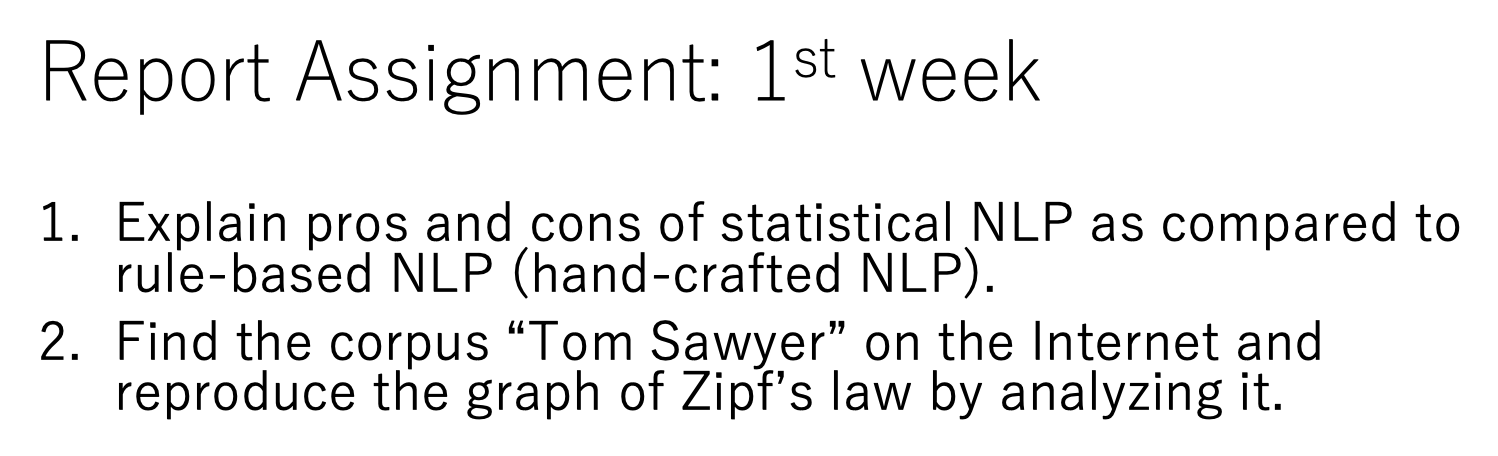

***

## 1.
ルールベースNLPは，すでに人間が持つ言語についての知識を簡単かつ正確にルールにできる．ただし，うまく動くようにするためには大変な労力を要する．  
一方確率ベースのNLPは，学習と相性がよい様々な手法が存在するがルールベースに比べて人間が持つ言語に関する知識のエンコードに労力を要する．  

***
## 2.
読み込んだプレーンテキストのコーパスを全て小文字にし，単語単位で区切る．
各単語の登場回数を確認し，RankとFrequencyを計算した後，各語のFrequency * Rankをプロットしている．

In [1]:
from operator import itemgetter
import nltk
import pandas as pd
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
import numpy as np

freq = {}
words_doc_PCR = nltk.corpus.reader.PlaintextCorpusReader('../data', 'twain-tomsawyer.txt')
stop_words = set(stopwords.words('english'))

words_doc = words_doc_PCR.words()
words_doc = [word.lower() for word in words_doc if word.isalpha()]

for word in words_doc :
    count = freq.get(word , 0)
    freq[word] = count + 1

rank = 1
df = pd.DataFrame(columns=['Rank', 'Frequency', 'Frequency * Rank'])
collection = sorted(freq.items(), key=itemgetter(1), reverse = True)

for word , freq_ in collection:
    df.loc[word] = [rank, freq_, rank*freq_]
    rank = rank + 1

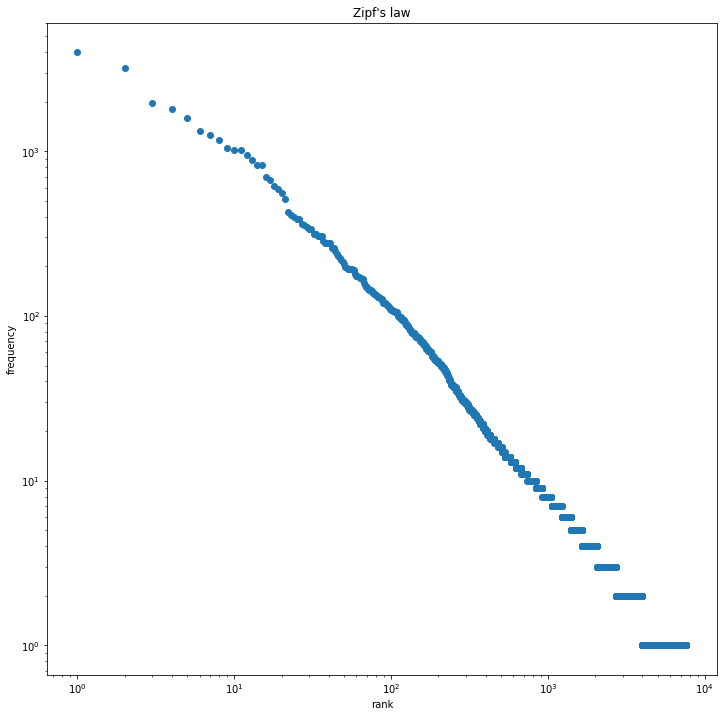

In [2]:
x = np.array(df['Rank'], dtype='int64')
y = np.array(df['Frequency'], dtype='int64')
plt.figure(figsize=(12, 12))
plt.scatter(x, y)
plt.loglog()
plt.title('Zipf\'s law')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.show()

## 参考
* https://iq.opengenus.org/zipfs-law/
* https://www.nltk.org/book-jp/ch12.html
* https://www.gutenberg.org/files/74/74-0.txt